<a href="https://colab.research.google.com/github/bambadij/xray_linkedin_learning/blob/main/Diabete_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloa our data set using this link [diabetes](https://data.mendeley.com/datasets/wj9rwkp9c2/1/files/2eb60cac-96b8-46ea-b971-6415e972afc9/)

In [4]:
!wget https://data.mendeley.com/datasets/wj9rwkp9c2/1/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_download

--2023-10-03 13:05:49--  https://data.mendeley.com/datasets/wj9rwkp9c2/1/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_download
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /v1/datasets/wj9rwkp9c2/1/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_download [following]
--2023-10-03 13:05:50--  https://data.mendeley.com/v1/datasets/wj9rwkp9c2/1/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_download
Reusing existing connection to data.mendeley.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd [following]
--2023-10-03 13:05:50--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd
Resolving prod-dcd-datase

Install module

In [117]:
#!pip install shap


Found existing installation: xgboost 1.7.6
Uninstalling xgboost-1.7.6:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/xgboost-1.7.6.dist-info/*
    /usr/local/lib/python3.10/dist-packages/xgboost.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/xgboost/*
Proceed (Y/n)? n


In [5]:
# Data handling
import pandas as pd
pd.set_option('display.max_columns', None)
import openpyxl
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


Read our dataset

In [6]:
df =pd.read_csv('file_download')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


Let's see info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


Check ID unique class unique and the number of class with value_count

In [8]:
df['ID'].nunique()

800

In [9]:
df['CLASS'].nunique()

5

In [10]:
df['CLASS'].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

let's see unique element on Class

In [11]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

Now replace some element and rechecked our unique value on Class

In [12]:
df['CLASS']=df['CLASS'].replace('N ','N')
df['CLASS']=df['CLASS'].replace('Y ','Y')
df['CLASS'].value_counts()

Y    844
N    103
P     53
Name: CLASS, dtype: int64

Do the same for gender

In [13]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

Replace f to F

In [14]:
df['Gender'] = df['Gender'].apply(str.upper)
df['Gender'].value_counts()

M    565
F    435
Name: Gender, dtype: int64

here we more Male than female diabetic

Visualize our result using plot

<Axes: >

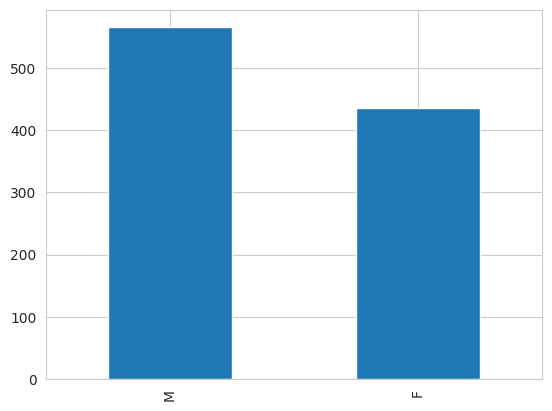

In [15]:
df['Gender'].value_counts().plot(kind='bar')

Now let check our Age column

In [16]:
df['AGE'].nunique()

50

Range now we create 8 volets of 20 to 30 30to 40 ...90 to 100

In [17]:
age_range = ["({0}-{1})".format(age,age+10) for age in range(20,100,10)]
age_range

['(20-30)',
 '(30-40)',
 '(40-50)',
 '(50-60)',
 '(60-70)',
 '(70-80)',
 '(80-90)',
 '(90-100)']

Reproduce and use pandas dataframe

In [20]:
df['age_range']=pd.cut(x=df['AGE'],bins=8,labels=age_range)
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,(60-70)
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,(20-30)
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,(60-70)
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,(60-70)
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,(30-40)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,(80-90)
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,(30-40)
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,(30-40)
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,(40-50)


In [21]:
df['age_range'].value_counts()

(60-70)     476
(70-80)     274
(50-60)      79
(40-50)      58
(30-40)      54
(80-90)      36
(90-100)     19
(20-30)       4
Name: age_range, dtype: int64

these values ​​resemble what we are accustomed to seeing almost the oldest are likely to have diabetes

In [22]:
correlation_values= df.corr()
correlation_values

<ipython-input-22-ca788036a6eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_values= df.corr()


,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.064920,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409
No_Pation,0.064920,1.000000,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719
AGE,-0.065980,-0.088006,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,-0.094434,-0.019160,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,-0.102457,0.000692,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,-0.007571,-0.032057,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.044390,-0.030171,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,-0.055908,-0.039885,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,0.026231,-0.013357,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,-0.064305,-0.003171,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322


Now lets visualize with heatmap

<Axes: >

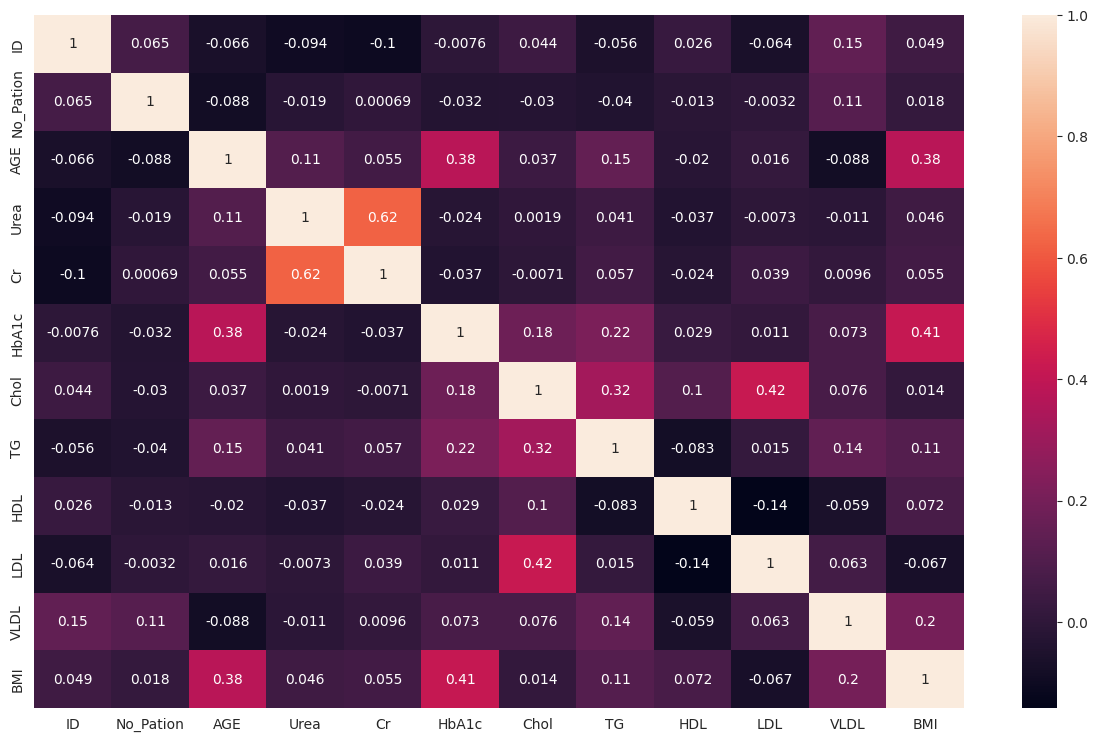

In [23]:
plt.figure(figsize=(15,9))
sns.heatmap(correlation_values,annot=True)

Apparently all the columns have correlation. We have o.62 between urea and the cre of a negative of -0.067 of LDL and BMI

Dropped column ID ,No_pation and AGE

In [24]:
df2 = df.drop(['ID','No_Pation','AGE'],axis=1)
df2

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,(60-70)
1,M,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,(20-30)
2,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,(60-70)
3,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,(60-70)
4,M,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,(30-40)
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,(80-90)
996,M,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,(30-40)
997,M,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,(30-40)
998,M,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,(40-50)


Now let's do the encoding using the labelEncoder

In [25]:
le1 = LabelEncoder()
df2['Gender']=le1.fit_transform(df2['Gender'])
le2=LabelEncoder()
df2['CLASS']=le2.fit_transform(df2['CLASS'])
le3=LabelEncoder()
df2['age_range']=le3.fit_transform(df2['age_range'])

let's inspect the classes that have been selected by the encoder

In [26]:
le1.classes_

array(['F', 'M'], dtype=object)

In [27]:
le2.classes_

array(['N', 'P', 'Y'], dtype=object)

In [28]:
le3.classes_

array(['(20-30)', '(30-40)', '(40-50)', '(50-60)', '(60-70)', '(70-80)',
       '(80-90)', '(90-100)'], dtype=object)

In [29]:
df2

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
1,1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,0
2,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
3,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
4,1,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2,6
996,1,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2,1
997,1,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2,1
998,1,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2,2


Use MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [40]:
columns_to_scale= ['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
columns_scaled = ['Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']
scale_values= df2[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)
df2_scaled = pd.DataFrame(scaled_array,columns=columns_scaled)
df2_scaled


,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565
...,...,...,...,...,...,...,...,...,...
995,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609
996,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043
997,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174
998,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826


Concate df2 and df2_scaled

In [41]:
df3 = pd.concat([df2,df2_scaled],axis=1)
df3

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,0,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,1,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,1,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2,6,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609
996,1,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2,1,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043
997,1,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2,1,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174
998,1,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2,2,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826


Now create X features and y target fot this choose column without Class for X and y choose the Class column

In [42]:
X =df3[['Gender','age_range','Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']].values
y=df3['CLASS'].values
train_set,test_set,train_label,test_label = train_test_split(X,y,test_size=0.20,random_state=0)

In [43]:
X[0]

array([0.        , 4.        , 0.109375  , 0.05037783, 0.26490066,
       0.40776699, 0.04444444, 0.22680412, 0.11458333, 0.01146132,
       0.17391304])

In [51]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Now compare our model for this we want to use this model

*   LogisticRegression
*   KNeighborsClassifier
*   RandomForestClassifier
*   GaussianVB
*   SVG
*   DecisionTreeRegression
*   XGBClassifier







In [61]:
models=[]
models.append(('LR',LogisticRegression(solver='lbfgs',multi_class='auto')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC(gamma='scale')))
models.append(('RFC',RandomForestClassifier(n_estimators=100)))
models.append(('DTR',DecisionTreeClassifier()))
models.append(('XGB',XGBClassifier(objective='multi:softmax', num_class=3)))

In [62]:
print(models)

[('LR', LogisticRegression()), ('KNN', KNeighborsClassifier()), ('NB', GaussianNB()), ('SVC', SVC()), ('RFC', RandomForestClassifier()), ('DTR', DecisionTreeClassifier()), ('XGB', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...))]


In [87]:
results=[]
names= []

In [63]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    try:
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
        print(msg)
    except Exception as e:
        print(f"Error for {name}: {str(e)}")

LR: 0.8950000000000001 (0.07952986860293433)
KNN: 0.8619999999999999 (0.16862977198585066)
NB: 0.932 (0.10428806259586952)
SVC: 0.797 (0.12124768039018312)
RFC: 0.9550000000000001 (0.09902019995940221)
DTR: 0.9510000000000002 (0.09137286249209882)
XGB: 0.959 (0.09385627309881847)


After using the mdoel_select of Kfold my XGB generates an error nan no so I changed to apply the StratifiedKFold
We see that XGB has the highest score with 0.959 so let's try to take a closer look with the XGBClassifier model

In [64]:
XGBClassifier_model = XGBClassifier()
XGB_model_fitted = XGBClassifier_model.fit(train_set,train_label)
XGB_model_predict = XGBClassifier_model.predict(test_set)

In [66]:
df3['CLASS'].unique() # 0 means No diabete , 1 means predicted 2 means diabete

array([0, 1, 2])

In [73]:
from sklearn.metrics import accuracy_score

print('XGB Classifer accuracy Score:\n',accuracy_score(test_label,XGB_model_predict))

XGB Classifer accuracy Score:
 0.995


Despite the size of our data, our model gave a score of 0.95

Let's Use Report with F1 Score ,recall prsision

In [77]:
from sklearn.metrics import classification_report

print('XGB Classifier Report:\n',classification_report(test_label,XGB_model_predict,target_names=['0','1','2']))

XGB Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      1.00       176

    accuracy                           0.99       200
   macro avg       1.00      0.96      0.98       200
weighted avg       1.00      0.99      0.99       200



Let's use the matrix to compare the true results predictions

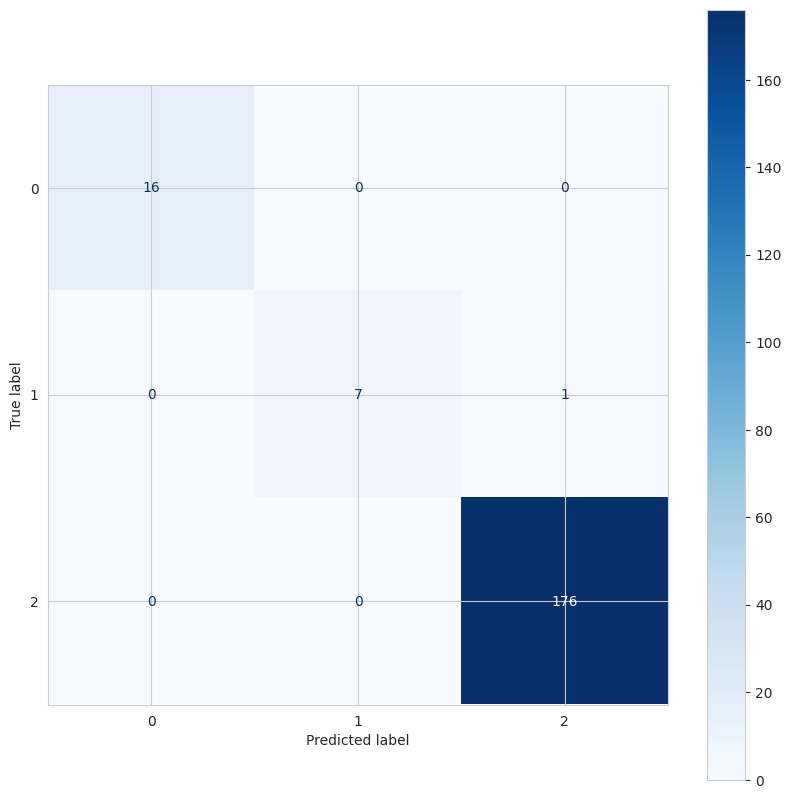

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
XGB_matrix = confusion_matrix(test_label,XGB_model_predict)
XGB_confusion_matrix_predict_display = ConfusionMatrixDisplay(XGB_matrix)
fig,ax =plt.subplots(figsize=(10,10))
XGB_confusion_matrix_predict_display.plot(cmap=plt.cm.Blues,ax=ax)

our confusion matrix shows the comparison of labels.
For label 0 the model does not predict diabetes cases
it's the same thing for label 2 the model predicts the value as diabetic one time out of 8

### Models explanation using **SHAP**

In [83]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.4 MB/s eta 0:00:00


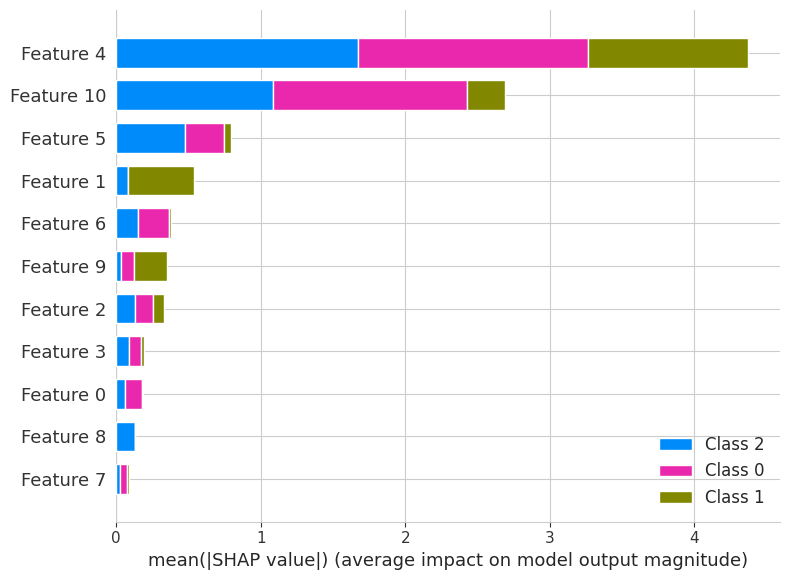

In [85]:
import shap
explainer = shap.TreeExplainer(XGB_model_fitted)
shap_values = explainer.shap_values(test_set)
shap.summary_plot(shap_values,test_set)

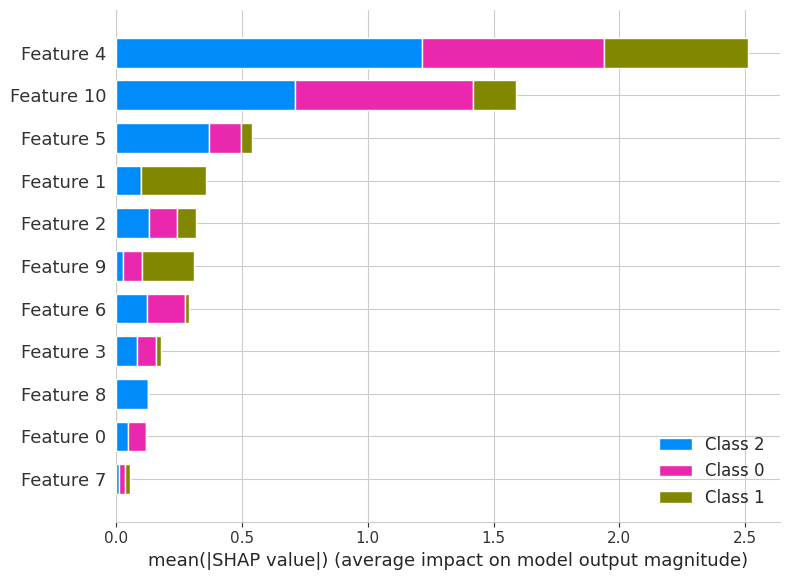

In [88]:
explainer = shap.TreeExplainer(XGB_model_fitted,train_set,feature_perturbation='interventional')
shap_values = explainer.shap_values(test_set)
shap.summary_plot(shap_values,test_set)